# Notebook for Simulating X-ray Scattering

In [1]:
import gued_theory as gt
import numpy as np
import matplotlib.pyplot as plt

## Simulate Static Atomic Scattering

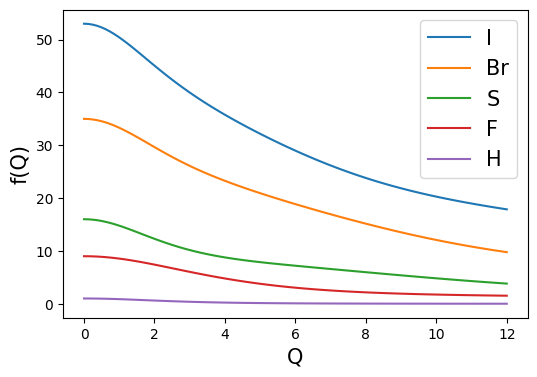

ff_I(0): 53.000600000000006
ff_Br(0): 34.9932


In [2]:
Q = np.linspace(0,12,100)

ff_I = gt.load_form_factor('I')
ff_Br = gt.load_form_factor('Br')
ff_S = gt.load_form_factor('S')
ff_F = gt.load_form_factor('F')
ff_H = gt.load_form_factor('H')

plt.figure(figsize=(6,4))
plt.plot(Q,ff_I(Q),label='I')
plt.plot(Q,ff_Br(Q),label='Br')
plt.plot(Q,ff_S(Q),label='S')
plt.plot(Q,ff_F(Q),label='F')
plt.plot(Q,ff_H(Q),label='H')
plt.legend(fontsize=15)
plt.xlabel('Q',fontsize=15)
plt.ylabel('f(Q)',fontsize=15)
plt.show()
print('ff_I(0):',ff_I(0))
print('ff_Br(0):',ff_Br(0))

## Simulate Static Molecular Scattering

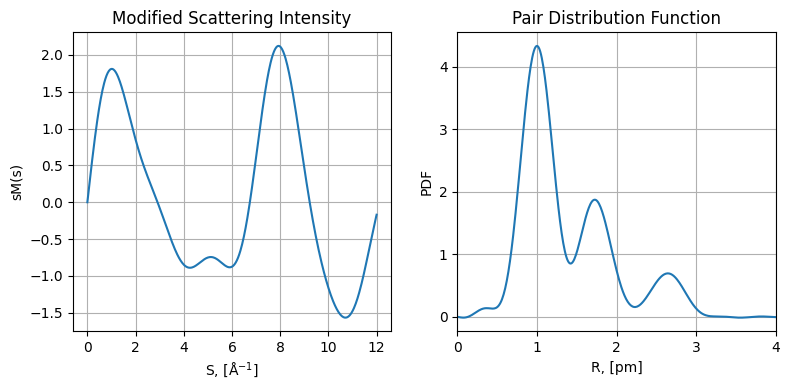

In [3]:
angs = '\u00C5' # Angstrom sign
path_mol='packages/Molecular_coordinates/'; # The molecular .xyz/.csv pathes
# path_dcs='/sdf/data/lcls/ds/ued_testfac/scratch/gued_online_analysis/jupyter_notebook/user_notebooks/dcs_repository/3.7MeV/';
mol_name='1-propanol'
file_type='.xyz'; # Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

s000=np.linspace(0,12,500)
s_max = 12 # Max Q range
r_max = 800  # Max R range
damp_const=33

coor,atom_sum  = gt.load_molecular_structure(path_mol,mol_name,file_type)
I_Br,I_at_Br,I_mol_Br,s_new = gt.get_I_xray(coor,atom_sum, s_max)
sM_new, PDF_0, r_0 = gt.get_sM_and_PDF_from_I(I_at_Br,I_mol_Br,s_new,r_max, 53)

plt.figure(figsize=(8,4))
    
plt.subplot(1,2,1)    
plt.plot(s_new,sM_new)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('sM(s)')
plt.title('Modified Scattering Intensity')
plt.grid()
    
plt.subplot(1,2,2)    
plt.plot(r_0/100,PDF_0)
plt.xlabel(r'R, [pm]')
plt.ylabel('PDF')
plt.title('Pair Distribution Function')
plt.xlim(0,4)
plt.grid()
    
plt.tight_layout()
plt.show()


## Simulate Fragmentation
Simulates a diffraction pattern based on the a unimolecular dissociation following: 

\begin{equation}
reactant \longrightarrow fragment_1 + fragment_2
\end{equation}

where the sum of fragments = reactant. __Code can take any number of fragments.__ 

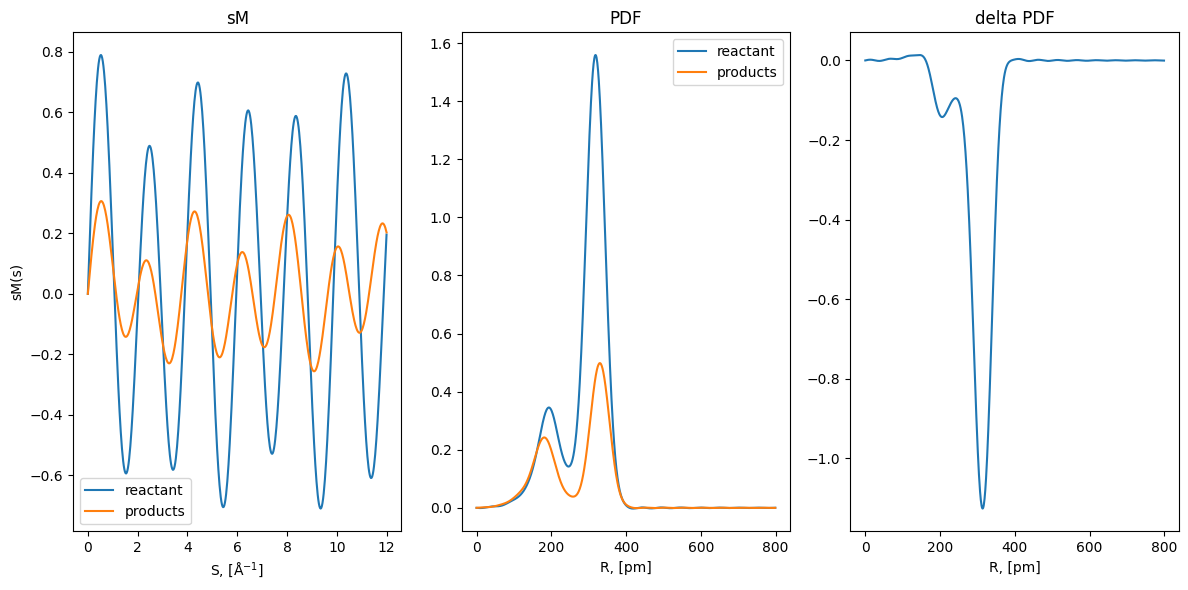

In [4]:
reactant='CHBr3_opt'
products = ['CBr2_opt', 'HBr_opt']
#products = ['iso-CHBr3_opt_new']

file_type='.xyz' # Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

s_max = 7 # Max Q range
r_max = 800  # Max R range

dsM, s, dPDF, r = gt.dissoc_sim_xray(path_mol, reactant, products, file_type)

## Simulate Vibrational Mode

187.19
fs= 178.6677496314531


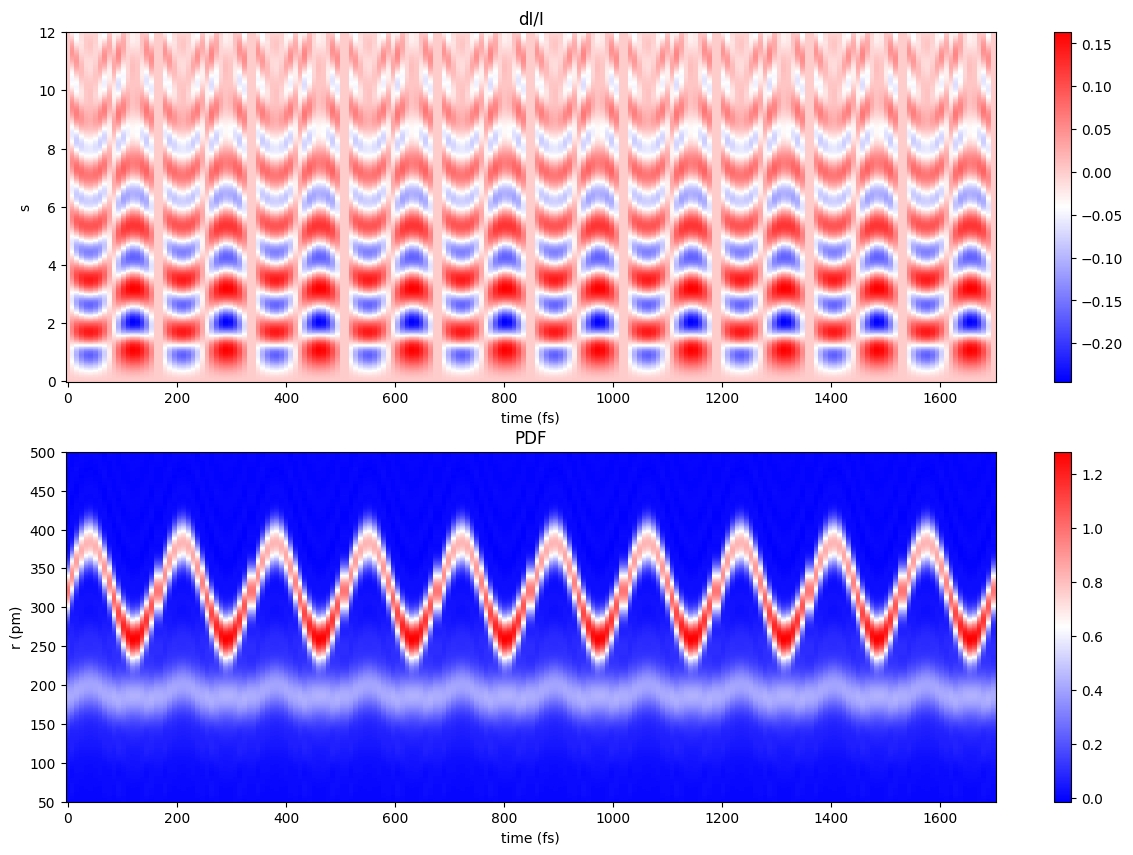

In [5]:
mol_name = 'CHBr2_opt_freq.hess.v006'
file_type='.xyz' # Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

#load_freq_xyz(path_mol, mol_name, file_type)

dI_I, time, s_new, PDF, r_new = gt.freq_sim_xray(path_mol, mol_name, file_type, plot=True)

## Simulate Dissociation and Vibration

48.2247
fs= 693.520458468621


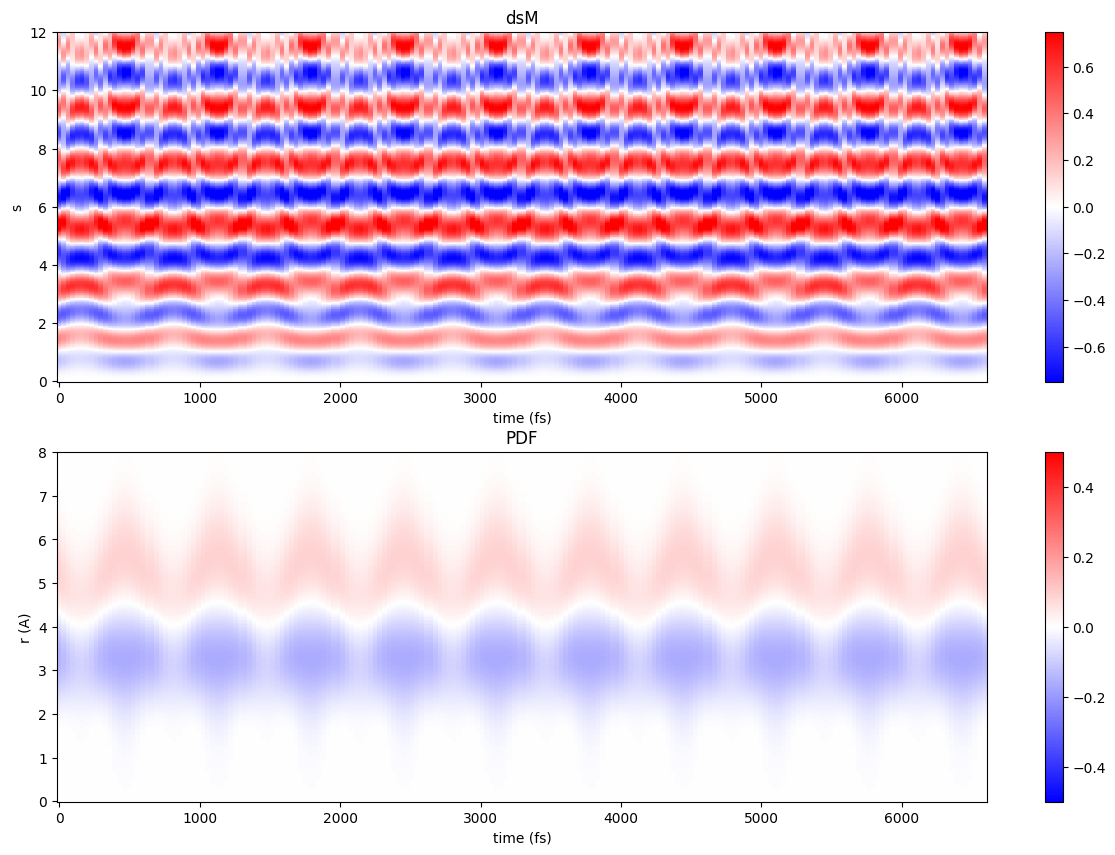

187.19
fs= 178.6677496314531


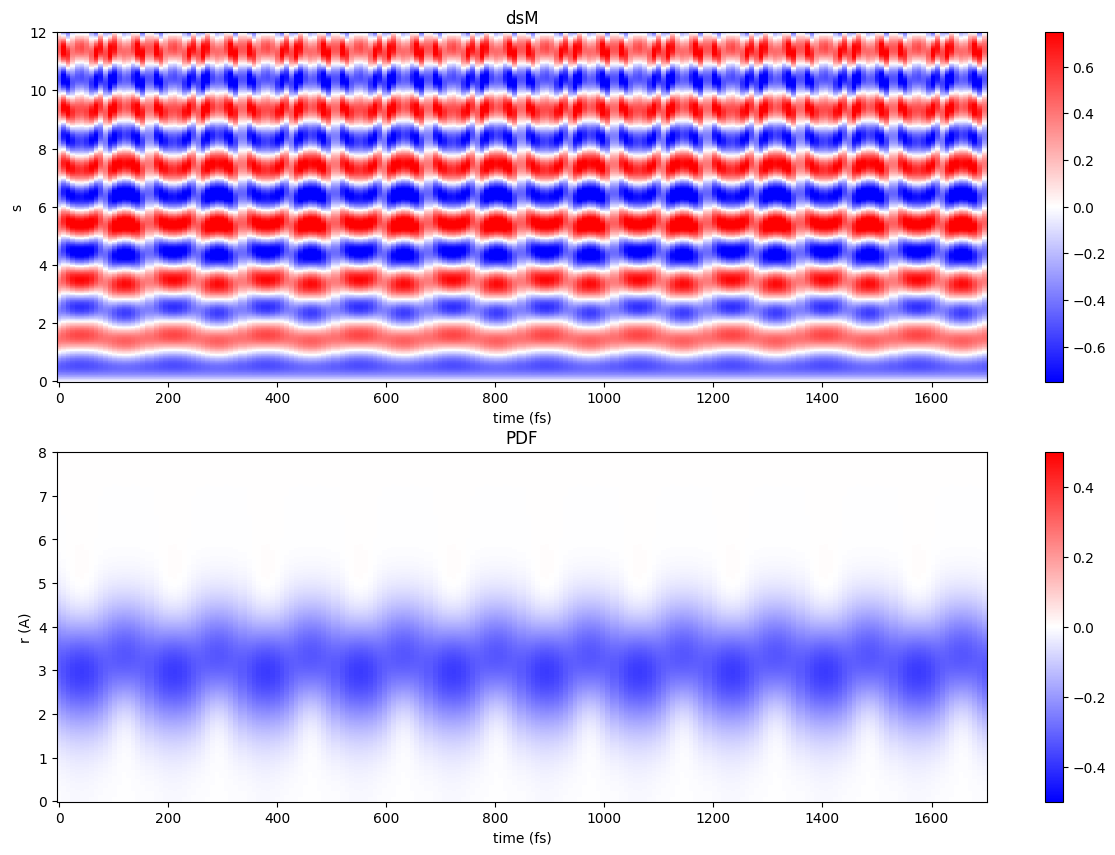

In [6]:
reactant = 'CHBr3_opt'
product = 'Br'
freq_name = 'iso_opt_freq.hess.v006'
freq_name2 = 'CHBr2_opt_freq.hess.v006'
file_type = '.xyz'

_, dPDF_iso, r, time = gt.dissoc_freq_sim_xray(path_mol, reactant, freq_name, file_type, conv=True)
_, dPDF_diss, r, time = gt.dissoc_freq_sim_xray(path_mol, reactant, freq_name2, file_type, other_xyz=product, conv=True)